# Upper Confidence Bound (UCB)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [2]:
import math
N = len(df.index) #number of total users
d = len(df.columns) #number of different ad versions
ads_selected = [] #list of different ad versions that are selected at each round
number_of_selections = [0] * d 
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0): 
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta = math.sqrt(((3/2) * math.log(n+1)) / number_of_selections[i])
            upper_bound = average_reward + delta
        else:
            upper_bound = 1e400 
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = df.values[n,ad]
    sum_of_rewards[ad] += reward 
    total_reward += reward 
    
print('Sum of rewards for each ad : ',sum_of_rewards) 
print('Total sum of rewards : ',total_reward)

Sum of rewards for each ad :  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total sum of rewards :  2178


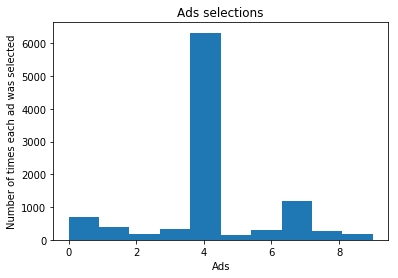

In [3]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()